## Notebook for testing gravity vector finding techniques

#### Imports

In [1]:
from data_process.file_wrapper import FileWrapper
from data_process.utils import get_by_path
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%matplotlib widget

#### Load data, get raw accelerometer values and plot them

Loading from pickle file...


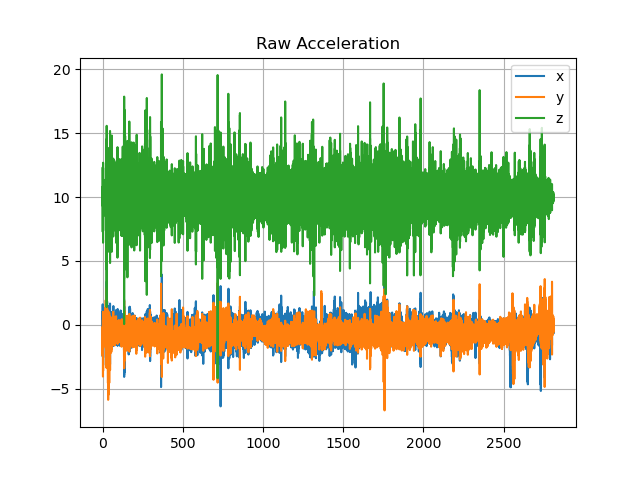

In [2]:
data = FileWrapper('/home/ntkot/theses/ros/bag_db/data_14_07_2023__20_43_44/rosbag2_14_07_2023__20_43_44/rosbag2_14_07_2023__20_43_44.pkl')
# print(*data.tree(), sep='\n')
imu_raw_time_ns = get_by_path(data.data, ['/imu/raw', 'time_ns'])
imu_raw_time = (imu_raw_time_ns - imu_raw_time_ns[0]) / 1e9
a_x_raw = get_by_path(data.data, ['/imu/raw', 'linear_acceleration', 'x'])
a_y_raw = get_by_path(data.data, ['/imu/raw', 'linear_acceleration', 'y'])
a_z_raw = get_by_path(data.data, ['/imu/raw', 'linear_acceleration', 'z'])

a_raw_fig = plt.figure(0)
a_raw_fig.clear()
plt.plot(imu_raw_time, a_x_raw)
plt.plot(imu_raw_time, a_y_raw)
plt.plot(imu_raw_time, a_z_raw)
plt.grid(which='both', axis='both')
plt.legend(['x','y','z'])
plt.title('Raw Acceleration')
plt.show()

#### Low-pass Butterworth filter

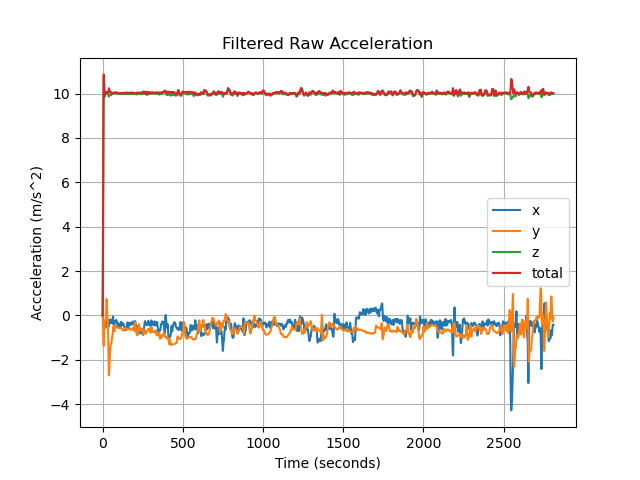

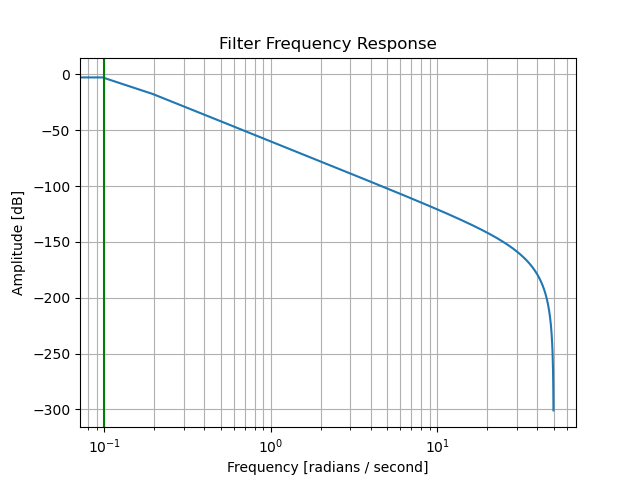

In [3]:
### Filter parameters
order = 3
freq_3db = 0.1

# Find sample rate and define filter
imu_time_diff = imu_raw_time[1:len(imu_raw_time)] - imu_raw_time[0:len(imu_raw_time)-1]
imu_sample_rate = 1 / np.average(imu_time_diff)
filter_b, filter_a = signal.butter(order, freq_3db, 'lowpass', fs=imu_sample_rate, output='ba')

# Apply filter
a_x_raw_butter_filtered = signal.lfilter(filter_b, filter_a, a_x_raw)
a_y_raw_butter_filtered = signal.lfilter(filter_b, filter_a, a_y_raw)
a_z_raw_butter_filtered = signal.lfilter(filter_b, filter_a, a_z_raw)

# Plot filtered data
a_raw_butter_filtered_fig = plt.figure(1)
a_raw_butter_filtered_fig.clear()
plt.plot(imu_raw_time, a_x_raw_butter_filtered)
plt.plot(imu_raw_time, a_y_raw_butter_filtered)
plt.plot(imu_raw_time, a_z_raw_butter_filtered)
plt.plot(imu_raw_time, np.sqrt(a_x_raw_butter_filtered ** 2 + a_y_raw_butter_filtered ** 2 + a_z_raw_butter_filtered ** 2))
plt.legend(['x','y','z', 'total'])
plt.title('Filtered Raw Acceleration')
plt.xlabel('Time (seconds)')
plt.ylabel('Accceleration (m/s^2)')
plt.grid(which='both', axis='both')
plt.show()

# Plot filter frequency response
w, h = signal.freqz(filter_b, filter_a, fs=imu_sample_rate)
filter_response_fig = plt.figure(2)
filter_response_fig.clear()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.axvline(freq_3db, color='green') # cutoff frequency
plt.title('Filter Frequency Response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

#### Moving average

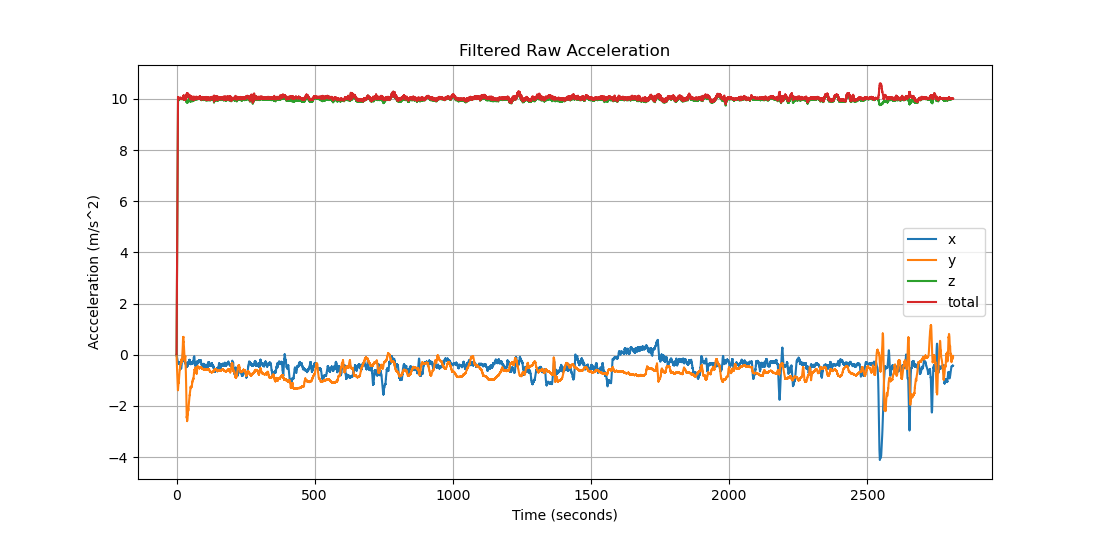

In [18]:
# Moving average window length
window = 500

# Function that calculates moving average
def moving_average(a, n):
    ret = np.concatenate((np.zeros(n-1), a))
    ret = np.cumsum(ret, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# Apply filter
a_x_raw_mv_filtered = moving_average(a_x_raw, window)
a_y_raw_mv_filtered = moving_average(a_y_raw, window)
a_z_raw_mv_filtered = moving_average(a_z_raw, window)

# Plot filtered data
a_raw_mv_filtered_fig = plt.figure(3)
a_raw_mv_filtered_fig.clear()
plt.plot(imu_raw_time, a_x_raw_mv_filtered)
plt.plot(imu_raw_time, a_y_raw_mv_filtered)
plt.plot(imu_raw_time, a_z_raw_mv_filtered)
plt.plot(imu_raw_time, np.sqrt(a_x_raw_mv_filtered ** 2 + a_y_raw_mv_filtered ** 2 + a_z_raw_mv_filtered ** 2))
plt.legend(['x','y','z', 'total'])
plt.title('Filtered Raw Acceleration')
plt.xlabel('Time (seconds)')
plt.ylabel('Accceleration (m/s^2)')
plt.grid(which='both', axis='both')
plt.show()